In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [110]:
data = pd.read_csv('KDDTrain+_20Percent.csv')
data.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [111]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Duration                     25191 non-null  int64  
 1   Protocol_type                25191 non-null  object 
 2   Service                      25191 non-null  object 
 3   Flag                         25191 non-null  object 
 4   Src_bytes                    25191 non-null  int64  
 5   Dst_bytes                    25191 non-null  int64  
 6   Land                         25191 non-null  int64  
 7   Wrong_fragment               25191 non-null  int64  
 8   Urgent                       25191 non-null  int64  
 9   Hot                          25191 non-null  int64  
 10  Num_failed_logins            25191 non-null  int64  
 11  Logged_in                    25191 non-null  int64  
 12  Num_compromised              25191 non-null  int64  
 13  Root_shell      

# EDA

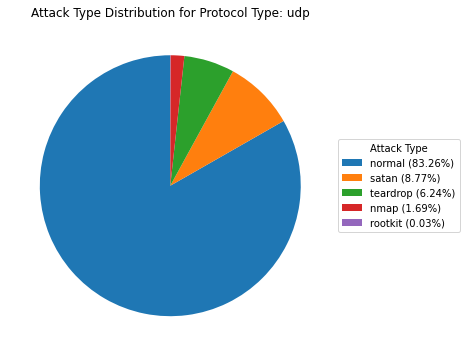

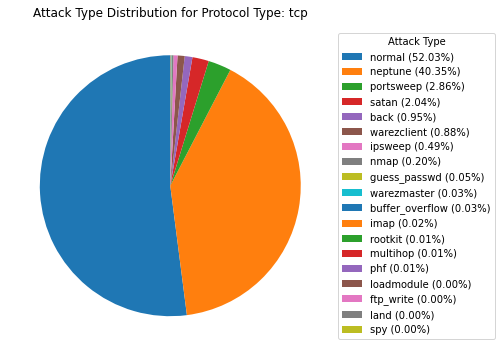

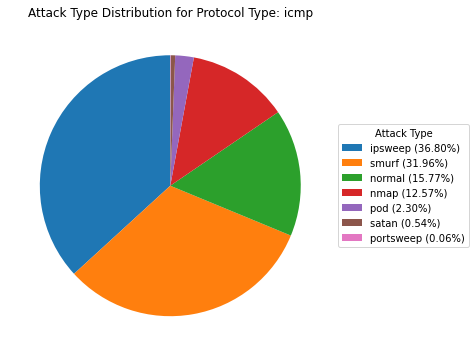

In [112]:
unique_protocols = data['Protocol_type'].unique()

# Create a pie chart for each protocol type
for protocol in unique_protocols:
    protocol_data = data[data['Protocol_type'] == protocol]
    attack_type_counts = protocol_data['attack_type'].value_counts()
    
    # Calculate percentages
    total_attacks = len(protocol_data)
    percentages = [f'{attack} ({(count / total_attacks * 100):.2f}%)' for attack, count in attack_type_counts.items()]
    
    # Plot the pie chart without percentages
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(attack_type_counts, labels=None, autopct='', startangle=90)
    plt.title(f'Attack Type Distribution for Protocol Type: {protocol}')
    
    # Add a legend with percentages
    plt.legend(wedges, percentages, title='Attack Type', loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

Scaling


In [113]:
#Performing standardization on continuous variables
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Create a DataFrame with only the numeric columns
numeric_data = data[numeric_columns.columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric data
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Replace the original numeric columns with the scaled values
for col in numeric_data.columns:
    data[col] = scaled_numeric_data[:, numeric_data.columns.get_loc(col)]

In [114]:
data


,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type,difficulty_level
0,-0.113553,udp,other,SF,-0.010032,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,...,-1.157853,2.764342,2.375576,-0.288000,-0.641822,-0.627382,-0.385141,-0.374289,normal,-1.927249
1,-0.113553,tcp,private,S0,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,...,-0.935105,-0.173836,-0.478171,-0.288000,1.603790,1.614409,-0.385141,-0.374289,neptune,-0.209434
2,-0.113553,tcp,http,SF,-0.009996,0.052471,-0.008911,-0.091225,-0.006301,-0.091935,...,1.069624,-0.440944,-0.380884,0.073746,-0.574454,-0.604964,-0.385141,-0.342777,normal,0.649474
3,-0.113553,tcp,http,SF,-0.010010,-0.034582,-0.008911,-0.091225,-0.006301,-0.091935,...,1.069624,-0.440944,-0.478171,-0.288000,-0.641822,-0.627382,-0.385141,-0.374289,normal,0.649474
4,-0.113553,tcp,private,REJ,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,...,-1.001929,-0.066994,-0.478171,-0.288000,-0.641822,-0.627382,2.884233,2.776979,neptune,0.649474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,-0.113553,tcp,exec,RSTO,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,...,-1.091028,-0.120415,-0.478171,-0.288000,-0.641822,-0.627382,2.884233,2.776979,neptune,-0.209434
25187,-0.113553,tcp,ftp_data,SF,-0.009954,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,...,1.069624,-0.440944,2.764723,1.339858,-0.641822,-0.627382,-0.385141,-0.374289,warezclient,-3.215611
25188,-0.113553,tcp,private,REJ,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,...,-1.046479,-0.066994,-0.478171,-0.288000,-0.641822,-0.627382,2.884233,2.776979,neptune,0.649474
25189,-0.113553,tcp,nnsp,S0,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,...,-0.979655,-0.120415,-0.478171,-0.288000,1.603790,1.614409,-0.385141,-0.374289,neptune,0.220020


# Encoding

In [115]:
#Service - Destination network service used
print(data['Service'].unique())

['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']


In [116]:
#Flag - Status of the connection: Normal or Error
print(data['Flag'].unique())

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [117]:
#Protocol Type - Protocol used in the connection
print(data['Protocol_type'].unique())

['udp' 'tcp' 'icmp']


In [118]:
one_hot_features = ['Protocol_type', 'Flag']
data = pd.get_dummies(data, columns=one_hot_features)

import category_encoders as ce
encoder = ce.CountEncoder(cols="Service", normalize=True)
data["Service"] = encoder.fit_transform(data["Service"])


data.head()


,Duration,Service,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,...,Flag_REJ,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH
0,-0.113553,0.034060,-0.010032,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,0,0,0,0,0,0,0,0,1,0
1,-0.113553,0.172720,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,0,0,0,0,1,0,0,0,0,0
2,-0.113553,0.317693,-0.009996,0.052471,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,1.238157,...,0,0,0,0,0,0,0,0,1,0
3,-0.113553,0.317693,-0.010010,-0.034582,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,1.238157,...,0,0,0,0,0,0,0,0,1,0
4,-0.113553,0.172720,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,1,0,0,0,0,0,0,0,0,0


In [119]:
print(data['attack_type'].unique())

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy']


In [120]:
#Mapping all attack types to their categories
dos_attacks = ['back','land','neptune','pod','smurf','teardrop', 'Apache2', 'udpstorm', 'Processtable', 'worm']
probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep', 'Mscan', 'Saint']
R2L_attacks = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'Xlock', 'Xsnoop', 'Snmpguess', 'Snmpgetattack', 'Httptunnel', 'Sendmail', 'Named']
U2R_attacks = ['rootkit', 'buffer_overflow', 'loadmodule', 'Perl', 'Sqlattack', 'Xterm', 'Ps']

def attack_category(attack):
    if attack in dos_attacks:
        attack_type = 1
    elif attack in probe_attacks:
        attack_type = 2
    elif attack in R2L_attacks:
        attack_type = 3
    elif attack in U2R_attacks:
        attack_type = 4
    else:
        attack_type = 0
    return attack_type

data['attack_category'] = data['attack_type'].apply(attack_category)

In [121]:
data.head()

,Duration,Service,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,...,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH,attack_category
0,-0.113553,0.034060,-0.010032,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,0,0,0,0,0,0,0,1,0,0
1,-0.113553,0.172720,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,0,0,0,1,0,0,0,0,0,1
2,-0.113553,0.317693,-0.009996,0.052471,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,1.238157,...,0,0,0,0,0,0,0,1,0,0
3,-0.113553,0.317693,-0.010010,-0.034582,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,1.238157,...,0,0,0,0,0,0,0,1,0,0
4,-0.113553,0.172720,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,0,0,0,0,0,0,0,0,0,1


In [122]:
data.drop(columns=['attack_type'], inplace=True)


In [123]:
data.head()

,Duration,Service,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,...,Flag_RSTO,Flag_RSTOS0,Flag_RSTR,Flag_S0,Flag_S1,Flag_S2,Flag_S3,Flag_SF,Flag_SH,attack_category
0,-0.113553,0.034060,-0.010032,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,0,0,0,0,0,0,0,1,0,0
1,-0.113553,0.172720,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,0,0,0,1,0,0,0,0,0,1
2,-0.113553,0.317693,-0.009996,0.052471,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,1.238157,...,0,0,0,0,0,0,0,1,0,0
3,-0.113553,0.317693,-0.010010,-0.034582,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,1.238157,...,0,0,0,0,0,0,0,1,0,0
4,-0.113553,0.172720,-0.010093,-0.039311,-0.008911,-0.091225,-0.006301,-0.091935,-0.026221,-0.807652,...,0,0,0,0,0,0,0,0,0,1


Feature Selection

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = data.drop(columns=['attack_category'])  # Replace 'target_column_name' with your actual target column
y = data['attack_category']

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed

# Train the model on your data
model.fit(X, y)

# Get feature importance scores
feature_importances = model.feature_importances_

# Select the top N most important features
num_features_to_select = 10  # Adjust as needed
feature_selector = SelectFromModel(model, threshold=-np.inf, max_features=num_features_to_select)
feature_selector.fit(X, y)
selected_features = X.columns[feature_selector.get_support()]
X_selected = X[selected_features]



In [125]:
print(X.columns)

Index(['Duration', 'Service', 'Src_bytes', 'Dst_bytes', 'Land',
       'Wrong_fragment', 'Urgent', 'Hot', 'Num_failed_logins', 'Logged_in',
       'Num_compromised', 'Root_shell', 'Su_attempted', 'Num_root',
       'Num_file_creations', 'Num_shells', 'Num_access_files',
       'Num_outbound_cmds', 'Is_hot_login', 'Is_guest_login', 'Count',
       'Srv_count', 'Serror_rate', 'Srv_serror_rate', 'Rerror_rate',
       'Srv_rerror_rate', 'Same_srv_rate', 'Diff_srv_rate',
       'Srv_diff_host_rate', 'Dst_host_count', 'Dst_host_srv_count',
       'Dst_host_same_srv_rate', 'Dst_host_diff_srv_rate',
       'Dst_host_same_src_port_rate', 'Dst_host_srv_diff_host_rate',
       'Dst_host_serror_rate', 'Dst_host_srv_serror_rate',
       'Dst_host_rerror_rate', 'Dst_host_srv_rerror_rate', 'difficulty_level',
       'Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp',
       'Flag_OTH', 'Flag_REJ', 'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR',
       'Flag_S0', 'Flag_S1', 'Flag_S2', 'Flag_S3', 

In [126]:
print(X_selected.columns)

Index(['Src_bytes', 'Dst_bytes', 'Count', 'Serror_rate', 'Same_srv_rate',
       'Diff_srv_rate', 'Dst_host_same_srv_rate', 'Dst_host_serror_rate',
       'Dst_host_srv_serror_rate', 'difficulty_level'],
      dtype='object')
